# Linear regression with one feature and Gradient Descent

In [ ]:
# @title Initialize dataset
import numpy as np

np.random.seed(1)
x_train = np.random.randint(1,10,(1,10)).reshape(-1,1)
y_train = x_train * np.random.randint(10) + np.random.randint(5)

In [ ]:
# @title compute cost, MSE = (1/2 m) sum(y predict - y actual)**2

def comp_cost_singlefeat(x_train, y_train, w, b):

  m = x_train.shape[0]
  mse = 0

  for i in range(m):
    y_hat_i = w * x[i] + b
    mse = mse + (y_train[i] - y_hat_i)**2
  mse = mse/(2* m)
  return mse


In [ ]:
# @title compute gradients dw and db .. djdw = (1/m) ( y predict - y actual) x

def comp_gradient_singlefeat(x_train, y_train, w, b):

  m = x_train.shape[0]
  djdw = 0
  djdb = 0

  for i in range(m):
    f = w * x_train[i] + b                # we cannot use matmul @ here. Since its scalar multipled by array element, it will throw error
    djdw_i = (f - y_train[i]) * x_train[i]
    djdb_i = f - y_train[i]
    djdw = djdw + djdw_i
    djdb = djdb + djdb_i

  djdw = djdw/ m
  djdb = djdb / m

  return djdw, djdb


In [ ]:
# @title compute gradient descent

def comp_gradientdescent_singlefeat(x_train, y_train, w_init, b_init, compute_func, gradient_func, learningrate, numiter):

  w = w_init
  b = b_init

  for i in range(numiter):
    dw, db = gradient_func(x_train, y_train, w, b)
    w = w - learningrate * dw
    b = b - learningrate * db

    if i% 100 == 0:
      print(f'Iternation : {i}, cost = {comp_gradient_singlefeat(x_train, y_train, w, b)}')
  return w,b

In [ ]:
# @title Test the model

w_init, b_init, learningrate,numiter = 0,0,0.01,1000
w_o, b_o = comp_gradientdescent_singlefeat(x_train, y_train, w_init, b_init, comp_gradient_singlefeat, comp_gradient_singlefeat, learningrate, numiter)

print(w_o, b_o)

# Linear regression with multiple features and Gradient Descent - Vectorized method 1

In [ ]:
# @title Prepare the data set
# x = (2,5), y = (2,1), weights, w = (5,) and, intercept b = scalar value
# multiple lin reg equation  y0 = w0 + w1 x1 + w2 x2 + w3 x3 + b. We will have to initialize x0 with all 1's
# for w0 param. But, below, we are initializing w0 already. So, no need to initialize again
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
x = np.random.rand(10).reshape(2,5)
y = np.random.randint(1, 5, (2,1))
b = 1.532
w = np.random.rand(5)
print(f'x {x.shape} = \n {x} \n y {y.shape}= \n{y} , \n w {w.shape} = {w}')

x (2, 5) = 
 [[0.5488135  0.71518937 0.60276338 0.54488318 0.4236548 ]
 [0.64589411 0.43758721 0.891773   0.96366276 0.38344152]] 
 y (2, 1)= 
[[3]
 [4]] , 
 w (5,) = [0.52889492 0.56804456 0.92559664 0.07103606 0.0871293 ]


In [ ]:
# @title Illustration  - how to w0 x0 + w1 x1 + w2 x2 + w3 x3 + b in a loop without and WITH vectorization
# on a single row of x matrix

y_pred = 0

def predict_single_loop(x,w,b):
  n_iter = x.shape[0]
  global y_pred

  for i in range(n_iter):
    y_pred_i = w[i] * x[i]
    y_pred =  y_pred + y_pred_i
  y_pred = y_pred + b
  return y_pred

x_singlerow = x[0,:]
pred_single = predict_single_loop(x_singlerow, w, b)
print(f'Predicted value = {pred_single} and Actual value for one observation = {y[0]}\n with weights = {w}')

def predict_single_vector(x,w,b):
  y_pred = x @ w + b
  return y_pred

pred_single_vector = predict_single_vector(x_singlerow, w, b)
print(f'Predicted value = {pred_single_vector} and Actual value for one observation = {y[0]}\n with weights = {w}')

In [ ]:
# @title Compute Cost Function (MSE) where MSE = (1/2 m) sum(y predict - y actual)**2

def compute_cost(x,y,w,b):
  num_iter = x.shape[0]
  mse = 0
  for i in range(num_iter):
    y_pred_i = x[i] @ w  + b
    mse = mse + (y_pred_i - y[i])**2
  mse = mse / (2 * num_iter)
  return mse

#cost = cost(x,y,w,b)
#print(f'cost = {cost}')


In [ ]:
# @title Compute gradients djdw and djdb.. partial deriv (cost) w.r.t w , djdw = (1/m) ( y predict - y actual) x

def compute_gradient(x, y, w, b):
  m,n = x.shape
  djdw  = np.zeros((n,))
  djdb = 0

  for i in range(m):

    error = (x[i] @ w  + b) - y[i]
    for j in range(n):
      djdw[j] = djdw[j] + error * x[i,j] # not x[i], not x[i,j]
    djdb = djdb + error

  djdw = djdw / m
  djdb = djdb / m

  return djdw, djdb

#djdw, djdb = gradients(x, y, w, b)
#print(f'Gradient djdw = {djdw}')
#print(f'Gradient djdb = {djdb}')

In [ ]:
# @title Compute Gradient Descent. Iterate until converge, (New w = Old w - LearningRate * djdw)

def gradientDescent(x, y, w_init, b_init, cost_func, gradient_func, learningRate, num_iter):

  cost_history = []
  w = w_init.copy()
  b = b_init

  for i in range(num_iter):
    dw, db = gradient_func(x, y, w, b)
    w = w - learningRate * dw
    b = b - learningRate * db
    cost_history.append(cost_func(x, y, w, b))

    if i % 100 == 0:
      print(f'iteration {i}, cost = {cost_func(x, y, w, b)}')

  return w,b, cost_history

In [ ]:
# @title Test

w_init = np.zeros_like(w)
b_init = 0.
num_iter = 1000
learningRate = 5.0e-7
w_o, b_o, Jhist = gradientDescent(x, y, w_init, b_init, compute_cost, compute_gradient, learningRate, num_iter)
print(f'{w_o}, {b_o}')

In [ ]:
# @title Plot Cost versus Iteration
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(Jhist)
ax2.plot(100 + np.arange(len(Jhist[100:])), Jhist[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost')
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step')
plt.show()

# Classification

In [ ]:
from sklearn import datasets
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
iris = datasets.load_iris()
X = iris.data
Y = iris.target
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [ ]:
decision = tree.DecisionTreeClassifier(random_state=0, max_depth=2).fit(X,Y)
scores = cross_val_score(decision, X, Y, cv=5)
print(scores.mean())

clf = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)
scores = cross_val_score(clf, X, Y, cv=5)
print(scores.mean())

0.9333333333333332
0.9533333333333334


In [ ]:
import pandas as pd


In [ ]:
datafrm = pd.read_csv('/content/drive/MyDrive/processed.cleveland.data', header = None)
datafrm.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [ ]:
datafrm.columns = ['age',
              'sex',
              'cp',
              'restbp',
              'chol',
              'fbs',
              'restecg',
              'thalach',
              'exang',
              'oldpeak',
              'slope',
              'ca',
              'thal',
              'hd']
datafrm.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [ ]:
datafrm.describe()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,hd
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [ ]:
datafrm.dtypes

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
hd           int64
dtype: object

In [ ]:
datafrm['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0'], dtype=object)

In [ ]:
datafrm['ca'].value_counts()
datafrm.drop(datafrm[datafrm['ca'] == '?'].index, inplace = True)
datafrm.drop(datafrm[datafrm['thal'] == '?'].index, inplace = True)

In [ ]:
datafrm.columns != 'hd'
x = datafrm.loc[:,datafrm.columns != 'hd']
y = datafrm.loc[:,datafrm.columns == 'hd']

In [ ]:
x.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


In [ ]:
pd.get_dummies(x, columns=['cp']).head()

,age,sex,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,cp_1.0,cp_2.0,cp_3.0,cp_4.0
0,63.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,1,0,0,0
1,67.0,1.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,0,0,0,1
2,67.0,1.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,1,0
4,41.0,0.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,1,0,0


In [ ]:
X_onehot_encoded = pd.get_dummies(x, columns=['cp',
                                       'restecg',
                                       'slope',
                                       'thal'])

In [ ]:
X_onehot_encoded.head()

,age,sex,restbp,chol,fbs,thalach,exang,oldpeak,ca,cp_1.0,...,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,1,...,0,0,0,1,0,0,1,0,1,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,0,...,1,0,0,1,0,1,0,1,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,0,...,1,0,0,1,0,1,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,...,0,1,0,0,0,0,1,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,...,0,0,0,1,1,0,0,1,0,0


In [ ]:
y['hd'].unique()

array([0, 1])

In [ ]:
y[y > 0] = 1

<ipython-input-61-802de79f6097>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[y > 0] = 1


[1 1 0 1 0 1 0 1 1 1 0 1 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 0 1 0 0 1 0 0 1
 1 0 1 1 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 1 0 0 0 1 1 0 1 1 1 1 0 0 0 1 0 0 1
 1]


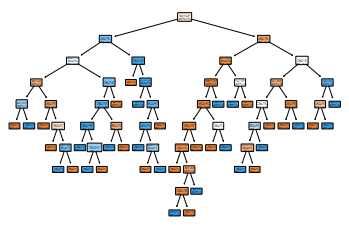

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

X_train, X_test, y_train, y_test = train_test_split(X_onehot_encoded, y, random_state=5)
clf_dt = DecisionTreeClassifier(random_state=5).fit(X_train,y_train )

predictions = clf_dt.predict(X_test)

plot_tree(clf_dt,
          filled=True,
          rounded=True,
          class_names=["No HD", "Yes HD"],
          feature_names=X_onehot_encoded.columns)
plt.show()


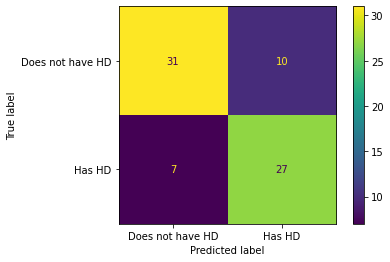

 
Correctly classified people that does not have HD corectly classified, precision = 0.8157894736842105
 
 Correctly classified people that have HD corectly classified, recall = 0.7941176470588235



In [ ]:
from sklearn.metrics import confusion_matrix ,ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix

cm = confusion_matrix(predictions, y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Does not have HD", "Has HD"])
disp.plot()
plt.show()

print(f' \nCorrectly classified people that does not have HD corectly classified, precision = {31/38}')
print(f' \n Correctly classified people that have HD corectly classified, recall = {27/34}\n')